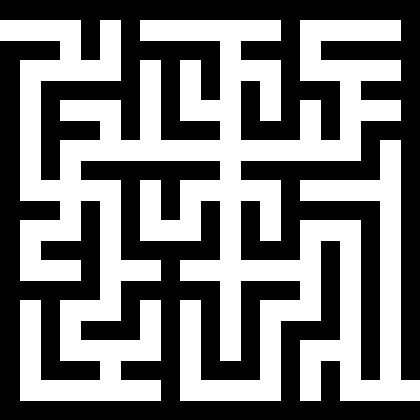

In [14]:
from PIL import Image
img = Image.open(r"maze.png")
display(img)

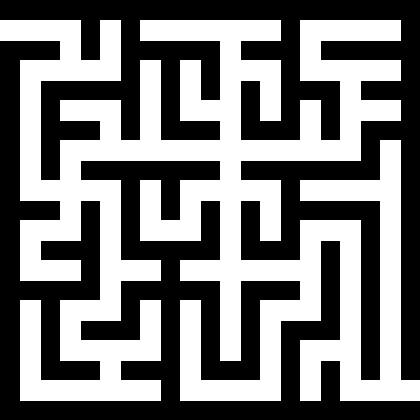

In [15]:
from IPython.display import Image, display
grayscale_img = img.convert("L")
grayscale_img.save("grayscale_img.png")
display(Image(filename="grayscale_img.png"))

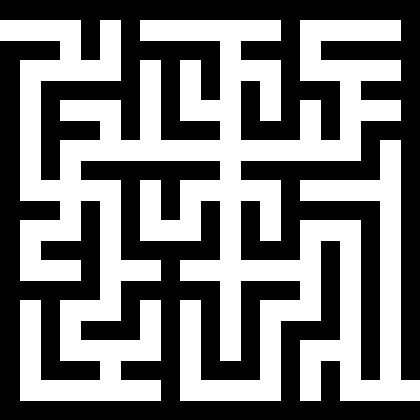

In [16]:
from IPython.display import Image, display
threshold_value = 128
binary_img = img.point(lambda p: p>threshold_value and 255)
binary_img.save("threshold_img.png")
display(Image(filename="threshold_img.png"))

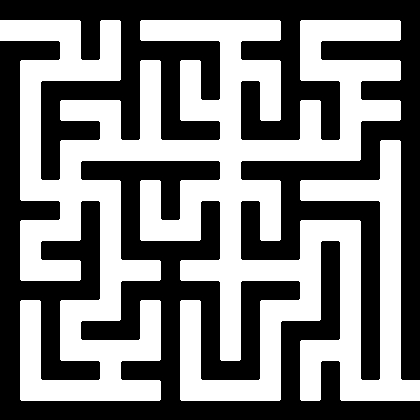

In [17]:
from PIL import Image, ImageFilter

img = Image.open("threshold_img.png")
filtered_img = img.filter(ImageFilter.MedianFilter(size=3))
filtered_img.save("filtered_img.png")
from IPython.display import Image, display
display(Image(filename="filtered_img.png"))

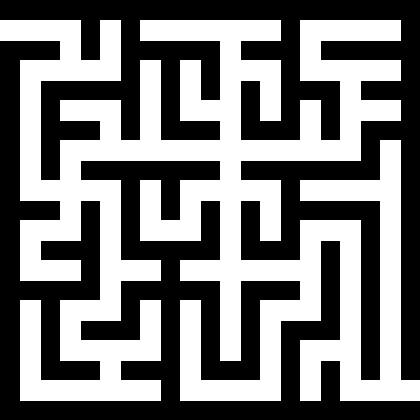

In [18]:
import cv2
import numpy as np
from IPython.display import Image, display

img = cv2.imread("threshold_img.png",cv2.IMREAD_GRAYSCALE)
contours,_=cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = np.copy(img)
cv2.drawContours(contour_img, contours, -1, (255, 0, 0),1)
cv2.imwrite("contour_img.png",contour_img)
display(Image(filename="contour_img.png"))

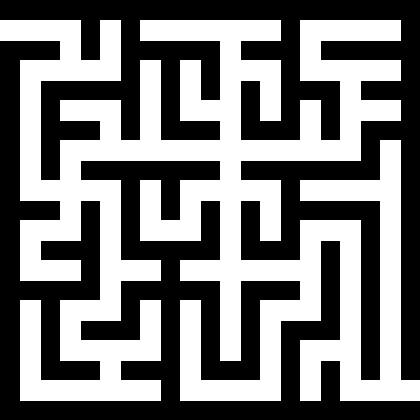

In [19]:
import cv2
import numpy as np
from IPython.display import Image, display

img = cv2.imread("threshold_img.png",cv2.IMREAD_GRAYSCALE)
contours,_ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
roi_img = np.copy(img)
def contour_area(c):
    return cv2.contourArea(c)
largest_contour = max(contours, key = contour_area)
cv2.drawContours(roi_img, [largest_contour],-1, (255, 255, 255),-1)
cv2.imwrite("roi_img.png",roi_img)
display(Image(filename="roi_img.png"))

In [20]:
import cv2
import numpy as np
roi_img = cv2.imread("roi_img.png",cv2.IMREAD_GRAYSCALE)
grid_width, grid_height = 20,20
resized_img = cv2.resize(roi_img, (grid_width,grid_height))
def map_coordinates(image_x, image_y):
    grid_x = (image_x / roi_img.shape[1]) * grid_width
    grid_y = grid_height - (image_y / roi_img.shape[0]) * grid_height 
    return int(grid_x), int(grid_y)

image_x, image_y = 50, 30
grid_x, grid_y = map_coordinates(image_x, image_y)
print("Image coordinates : ", image_x,image_y)
print("Grid coordinates : ", grid_x, grid_y)

Image coordinates :  50 30
Grid coordinates :  2 18


In [21]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

window = tk.Tk()
window.title("Maze start and goal selector")

canvas = tk.Canvas(window, width=400, height=400)
canvas.pack()

file_path = filedialog.askopenfilename()
if file_path:
    image = Image.open(file_path)
    photo = ImageTk.PhotoImage(image)
    canvas.create_image(0, 0, anchor=tk.NW, image=photo)
else:
    print("No image selected.")

start_x, start_y = None, None
goal_x, goal_y = None, None

def on_canvas_click(event):
    global start_x, start_y, goal_x, goal_y
    x,y = event.x, event.y
    if start_x is None:
        start_x, start_y = x,y
        print("Start coordinates : ", start_x, start_y)
    elif goal_x is None:
        goal_x, goal_y = x,y
        print("Goal coordinates : ", goal_x, goal_y)
    
    canvas.create_oval(x-5,y-5,x+5,y+5, fill = "red", width=2)
canvas.bind("<Button-1>",on_canvas_click)


def close_window():
    window.destroy()
    window.quit()

finish_button = tk.Button(window, text="Finish", command=close_window)
finish_button.pack()

window.mainloop()

Start coordinates :  9 31
Goal coordinates :  388 396


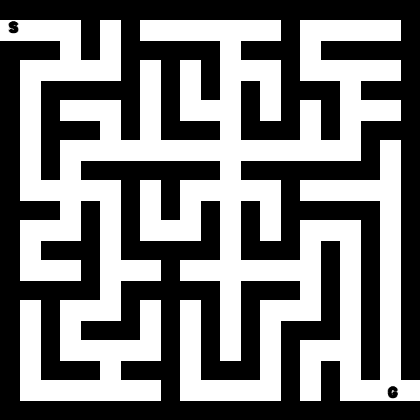

In [22]:
import cv2
import numpy as np
from IPython.display import Image, display

# Read the resized image
resized_image = cv2.imread("roi_img.png", cv2.IMREAD_GRAYSCALE)  # Replace "resized_image.png" with the path to your resized image

# Define the coordinates of the start and goal locations
start_coordinates = (start_x, start_y)
goal_coordinates = (goal_x, goal_y)  # Replace with the grid coordinates of your goal location

# Define a function to mark locations with symbols
def mark_location(image, coordinates, text, color, thickness):
    return cv2.putText(image, text, coordinates, cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, thickness, cv2.LINE_AA)

# Create a copy of the resized image to mark start and goal locations
marked_image = np.copy(resized_image)

# Set the text colors
start_color = (0, 255, 0)  # Green for start
goal_color = (0, 0, 255)  # Red for goal

# Mark the start and goal locations
marked_image = mark_location(marked_image, start_coordinates, 'S', start_color, 2)
marked_image = mark_location(marked_image, goal_coordinates, 'G', goal_color, 2)


# Save the marked image (optional)
cv2.imwrite("marked_image.png", marked_image)  # Replace "marked_image.png" with the desired output file path
display(Image(filename="marked_image.png"))

In [23]:
import heapq
import numpy as np
from skimage import io

# Load the image as grayscale
gray_image = io.imread("maze.png", as_gray=True)

# Set threshold values
threshold_open = 0.85
threshold_blocked = 0.10

# Create the maze array
maze_array = [[' ' if pixel_value > threshold_open else 'X' if pixel_value < threshold_blocked else ' ' for pixel_value in row] for row in gray_image]

# Set 'S' (start) and 'G' (goal) locations
start_coordinates = (start_x, start_y)  # Replace with the actual coordinates of the start point
goal_coordinates = (goal_x, goal_y)   # Replace with the actual coordinates of the goal point

# Create a new maze array with 'S' and 'G'
marked_maze_array = [row[:] for row in maze_array]
marked_maze_array[start_coordinates[1] // 20][start_coordinates[0] // 20] = 'S'
marked_maze_array[goal_coordinates[1] // 20][goal_coordinates[0] // 20] = 'G'

print("Initial Maze Array:")
for row in marked_maze_array:
    print(''.join(map(str, row)))

# Assume you have the labeled_image generated from the segmentation
labeled_image = np.where(gray_image > threshold_open, 1, 0)  # Use 0 for open spaces, 1 for obstacles

# Mark 'S' and 'G' in the labeled image
labeled_image[start_coordinates[1] // 20, start_coordinates[0] // 20] = 2  # Use 2 for the start
labeled_image[goal_coordinates[1] // 20, goal_coordinates[0] // 20] = 3  # Use 3 for the goal

print("Labeled Image:")
print(labeled_image)

def astar_algorithm(maze, start, goal):
    def heuristic(current, goal):
        return np.sqrt((current[0] - goal[0]) ** 2 + (current[1] - goal[1]) ** 2)


    open_list = [(0, start)]
    came_from = {}
   # Modify the initialization of g_score
    g_score = {(x, y): float('inf') for x in range(len(maze[0])) for y in range(len(maze))}

    g_score[(start[0], start[1])] = 0

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = reconstruct_path(came_from, current)
            return path

        for neighbor in get_neighbors(current, maze):
            tentative_g_score = g_score[current] + 1  # Assuming each step has a cost of 1

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score, neighbor))


def get_neighbors(current, maze):
    x, y = current
    neighbors = []

    # Define possible moves (up, down, left, right)
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    for dx, dy in moves:
        new_x, new_y = x + dx, y + dy

        # Check if the new position is within the maze bounds
        if 0 <= new_x < len(maze[0]) and 0 <= new_y < len(maze):
            # Check if the cell is open (you may need to adapt this check based on your maze representation)
            if maze[new_y][new_x] != 'X':  # 'X' represents a blocked cell
                neighbors.append((new_x, new_y))

    return neighbors


def reconstruct_path(came_from, current):
    # Reconstruct the path from the 'came_from' dictionary
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.insert(0, current)
    return path

# Find the path using the A* algorithm
path = astar_algorithm(marked_maze_array, start_coordinates, goal_coordinates)

# Print the found path
print("Found Path:", path)


Initial Maze Array:
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
SXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Found Path: [(9, 31), (10, 31), (11, 31), (12, 31), (13, 31), (14, 31), (15, 31), (16, 31), (17, 31), (18, 31), (19, 31), (20, 31), (21, 31), (22, 31), (23, 31), (23, 32), (24, 32), (24, 33), (25, 33), (25, 34), (26, 34), (26, 35), (27, 35), (27, 36), (28, 36), (28, 37), (29, 37), (29, 38), (30, 38), (30, 39), (31, 39), (31, 40), (32, 40), (33, 40), (34, 40), (35, 40), (36, 40), (37, 40), (38, 40), (39, 40), (40, 40), (41, 40), (42, 40), (43, 40), (44, 40), (45, 40), (46, 40), (47, 40), (48, 40), (49, 40), (50, 40), (51, 40), (52, 40), (53, 40), (54, 40), (55, 40), (56, 40), (57, 40), (58, 40), (59, 40), (60, 40), (60, 41), (60, 42), (60, 43), (60, 44), (60, 45), (60, 46), (60, 47), (60, 48), (60, 49), (60, 50), (60, 51), (60, 52), (60, 53), (60, 54), (60, 55), (60, 56), (60, 57), (60, 58), (60, 59), (60, 60), (60, 61), (60, 62), (60, 63), (60, 64), (60, 65), (60, 66), (60, 67), (60, 68), (60, 69), (60, 70), (60, 71), (60, 72), (60, 73), (60, 74), (60, 75), (60, 76), (60, 77), (60, 78)

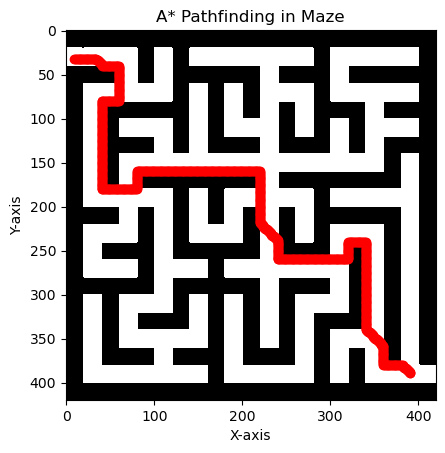

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def visualize_maze_with_path(maze, start, goal, path):
    # Swap black and white colors in the colormap
    cmap = ListedColormap(['white', 'black', 'green', 'red'])

    # Convert maze_array to a NumPy array with numerical values
    maze_array = np.array([[0 if cell == ' ' else 1 for cell in row] for row in maze])

    # Mark 'S' and 'G' in the maze array
    maze_array[start[1] // 20, start[0] // 20] = 2  # Use 2 for the start
    maze_array[goal[1] // 20, goal[0] // 20] = 3  # Use 3 for the goal

    # Plot the maze
    plt.imshow(maze_array, cmap=cmap, origin='upper')

    # Extract x and y coordinates from the path and remove diagonal moves
    path_x, path_y = zip(*path)
    path_x, path_y = remove_diagonal_moves(path_x, path_y)

    # Plot the path as a red line with adjusted linewidth
    plt.plot(path_x, path_y, color='red', marker='o', linewidth=0.5)

    # Set labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('A* Pathfinding in Maze')

    # Save the image with the path
    plt.savefig('maze_with_path.png')

    # Show the plot
    plt.show()

# Function to remove diagonal moves from the path
def remove_diagonal_moves(path_x, path_y):
    filtered_x, filtered_y = [path_x[0]], [path_y[0]]

    for i in range(1, len(path_x)):
        # Check if the move is not diagonal
        if path_x[i] == path_x[i-1] or path_y[i] == path_y[i-1]:
            filtered_x.append(path_x[i])
            filtered_y.append(path_y[i])

    return filtered_x, filtered_y


# Call this function to visualize the maze with the path
visualize_maze_with_path(maze_array, (start_x, start_y), (goal_x, goal_y), path)
